# **Đồ án Khai phá dữ liệu - Nhóm 7**
### **Sinh viên thực hiện:**
* Lê Vĩnh Hân - 2251068192
* Nguyễn Thái Bảo Duy - 2251068181
* Đỗ Nguyên Giáp - 2251068189
#### Dataset: https://www.kaggle.com/datasets/cemeraan/3a-superstore

# **Importing module & Exploring Data**

In [1]:
import numpy as np, polars as pl, pyarrow as pa
print("NumPy:", np.__version__)
print("Polars:", pl.__version__)
print("PyArrow:", pa.__version__)


NumPy: 1.26.4
Polars: 1.10.0
PyArrow: 17.0.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

In [3]:
DATA_CLEAN = Path(r"D:\datamining-fix\data-mining\source\data_clean")
final_data = DATA_CLEAN / "final_data.parquet"
df = pl.read_parquet(str(final_data))  # đọc dữ liệu với polars


In [4]:
print(f'Số dòng: {df.height}')
print(f'Số cột: {len(df.columns)}')

Số dòng: 51185032
Số cột: 22


In [5]:
df.head()

order_id,order_date,order_year,order_month,order_weekday,total_basket,branch_id,branch_region,branch_city,branch_town,item_id,item_name,category1,category2,category3,category4,brand,amount,unit_price,total_price,discount_amount,user_id
str,datetime[μs],i32,i8,i8,f64,str,str,str,str,str,str,str,str,str,str,str,i64,f64,f64,f64,str
"""1050866""",2022-02-04 00:00:00,2022,2,5,78.43,"""427-GA3""","""Güneydoğu Anadolu""","""Gaziantep""","""OĞUZELİ""","""11486""","""KENT TOFITA 47 GR LIMON *20*""","""SEKERLEME""","""SAKIZ-SEKERLEME""","""SEKERLEMELER""","""YUMUSAK SEKER""","""KENT""",5,10.5,48.25,4.25,"""14552"""
"""1757638""",2022-02-28 00:00:00,2022,2,1,544.74,"""427-GA3""","""Güneydoğu Anadolu""","""Gaziantep""","""OĞUZELİ""","""20764""","""KENT TOFITA 47 GR CILEK *20*""","""SEKERLEME""","""SAKIZ-SEKERLEME""","""SEKERLEMELER""","""YUMUSAK SEKER""","""KENT""",4,8.75,33.56,1.44,"""50859"""
"""1133487""",2023-06-02 00:00:00,2023,6,5,1729.2,"""472-BA2""","""Güneydoğu Anadolu""","""Batman""","""KOZLUK""","""11094""","""KENT JELIBON 30 GR GOLCU *24*""","""SEKERLEME""","""SAKIZ-SEKERLEME""","""SEKERLEMELER""","""YUMUSAK SEKER""","""KENT""",5,2.75,15.6,-1.85,"""29028"""
"""1953633""",2022-03-24 00:00:00,2022,3,4,956.39,"""463-ŞA2""","""Güneydoğu Anadolu""","""Şanlıurfa""","""AKÇAKALE""","""22240""","""KENT JELIBON 77 GR VAMPIR *24…","""SEKERLEME""","""SAKIZ-SEKERLEME""","""SEKERLEMELER""","""YUMUSAK SEKER""","""KENT""",5,8.2,37.9,3.1,"""81689"""
"""1586376""",2021-09-09 00:00:00,2021,9,4,796.69,"""42-AD2""","""Güneydoğu Anadolu""","""Adıyaman""","""BESNİ""","""18518""","""KENT JELIBON 80 GR KARPUZ *24…","""SEKERLEME""","""SAKIZ-SEKERLEME""","""SEKERLEMELER""","""YUMUSAK SEKER""","""KENT""",7,15.0,77.77,27.23,"""61798"""


In [6]:
df.schema # df.info()

Schema([('order_id', String),
        ('order_date', Datetime(time_unit='us', time_zone=None)),
        ('order_year', Int32),
        ('order_month', Int8),
        ('order_weekday', Int8),
        ('total_basket', Float64),
        ('branch_id', String),
        ('branch_region', String),
        ('branch_city', String),
        ('branch_town', String),
        ('item_id', String),
        ('item_name', String),
        ('category1', String),
        ('category2', String),
        ('category3', String),
        ('category4', String),
        ('brand', String),
        ('amount', Int64),
        ('unit_price', Float64),
        ('total_price', Float64),
        ('discount_amount', Float64),
        ('user_id', String)])

In [7]:
df.describe()

# bộ dữ liệu cung cấp dữ liệu bán hàng trong 3 năm 2021 - 2023

statistic,order_id,order_date,order_year,order_month,order_weekday,total_basket,branch_id,branch_region,branch_city,branch_town,item_id,item_name,category1,category2,category3,category4,brand,amount,unit_price,total_price,discount_amount,user_id
str,str,str,f64,f64,f64,f64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,str
"""count""","""51185032""","""51185032""",5.1185032e7,5.1185032e7,5.1185032e7,5.1185032e7,"""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""",5.1185032e7,5.1185032e7,5.1185032e7,5.1185032e7,"""51185032"""
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0"""
"""mean""",null,"""2022-04-23 08:48:36.568578""",2021.854213,5.992051,4.002569,1621.580318,null,null,null,null,null,null,null,null,null,null,null,4.499822,64.820592,256.044922,35.595402,null
"""std""",null,null,0.772754,3.333038,2.001676,1660.617662,null,null,null,null,null,null,null,null,null,null,null,2.291348,115.677207,548.114821,227.648978,null
"""min""","""1""","""2021-01-01 00:00:00""",2021.0,1.0,1.0,0.0,"""11-AD1""","""Akdeniz""","""Adana""","""ABANA""","""1""","""""ACE ELDE YIKAMA BAHAR 700 GR …","""BEBEK""","""AGDA-TUY DOKUCULER""","""1.KALITE""","""1.KALITE""","""8X4""",1.0,0.0,0.0,-56788.88,"""1"""
"""25%""",null,"""2021-08-27 00:00:00""",2021.0,3.0,2.0,713.28,null,null,null,null,null,null,null,null,null,null,null,2.0,15.2,42.45,-5.38,null
"""50%""",null,"""2022-04-23 00:00:00""",2022.0,6.0,4.0,1285.13,null,null,null,null,null,null,null,null,null,null,null,4.0,35.5,116.06,4.22,null
"""75%""",null,"""2022-12-18 00:00:00""",2022.0,9.0,6.0,2108.49,null,null,null,null,null,null,null,null,null,null,null,6.0,78.0,288.12,39.69,null
"""max""","""9999999""","""2023-08-14 00:00:00""",2023.0,12.0,7.0,307683.45,"""777-YA1""","""İç Anadolu""","""Şırnak""","""İZNİK""","""9999""","""İNSAN NE İLE YAŞAR / TUNA""","""TEMIZLIK""","""ZEKA GELISTIRICI""","""ZEYTIN""","""ZUCCACIYE""","""ZERDALI""",8.0,6302.3,59520.96,50396.4,"""99999"""


In [8]:
df.select(pl.all().null_count()) # check null (df.isnull().sum() - pandas)

# dữ liệu sạch - không có giá trị khuyết

order_id,order_date,order_year,order_month,order_weekday,total_basket,branch_id,branch_region,branch_city,branch_town,item_id,item_name,category1,category2,category3,category4,brand,amount,unit_price,total_price,discount_amount,user_id
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **1. Phân tích và dự đoán doanh thu**

phân tích và dự đoán doanh thu dựa trên doanh thu thuần - nên dùng total_basket ở cấp đơn hàng

total_basket là số tiền mà khách hàng phải trả cho mỗi hóa đơn khác với total_price là số tiền cho mỗi món hàng

vd total_price: 3 wireless-mouse - mỗi item 20$ => 60$ cho 3 items => chiết khấu 10% => total_price = 54$

vd total_basket: 3 wireless-mouse - mỗi item 20$, 5 books - mỗi item 5$ => tổng hóa đơn 85$ => chiết khấu 10$ => total_basket = 76.5$

gross_revenue là một công cụ chiến lược thay vì công cụ tài chính

## **1.1. Tính doanh thu thuần và doanh thu gộp**

In [9]:
# gross revenue - doanh thu trước khi trừ chiết khấu
df = df.with_columns(
    (pl.col('amount') * pl.col('unit_price')).alias('gross_revenue')
)

In [10]:
# tổng doanh thu gộp 
df = df.with_columns(
    pl.sum("gross_revenue").over("order_id").alias("total_gross_revenue_per_order")
)

In [11]:
# doanh thu thuần - net revenue
df = df.with_columns(
    pl.when(pl.col("total_gross_revenue_per_order") > 0)
      .then(
          (pl.col("gross_revenue") / pl.col("total_gross_revenue_per_order")) * pl.col("total_basket")
      )
      .otherwise(0)
      .alias("net_revenue")
)

In [12]:
# tính lại discount_amount
df = df.with_columns(
    (pl.col("gross_revenue") - pl.col("net_revenue")).alias("discount_amount")
)

In [13]:
df = df.drop('total_gross_revenue_per_order')

## **1.2. Lượng doanh thu mà doanh nghiệp phải chi trả cho chiết khấu hàng tháng**

In [13]:
# doanh thu và chiết khấu theo tháng
monthly_analysis = (
    df.group_by(["order_year", "order_month"])
    .agg([
        pl.sum("gross_revenue").alias("total_gross_revenue"),
        pl.sum("net_revenue").alias("total_net_revenue"),
        pl.sum("discount_amount").alias("total_discount")
    ])
    .with_columns(
        # tính tỷ lệ chiết khấu tổng thể của tháng
        # (tổng tiền giảm giá / tổng doanh thu gộp) * 100
        pl.when(pl.col("total_gross_revenue") > 0)
          .then(((pl.col("total_discount") / pl.col("total_gross_revenue")) * 100))
          .otherwise(0)
          .alias("overall_discount_rate")
    )
    .sort(["order_year", "order_month"])
    .to_pandas()
)

print("Kết quả phân tích chiết khấu theo tháng:")
print(monthly_analysis.head(10))

Kết quả phân tích chiết khấu theo tháng:
   order_year  order_month  total_gross_revenue  total_net_revenue  \
0        2021            1         4.858721e+08       2.623747e+08   
1        2021            2         4.381021e+08       2.453482e+08   
2        2021            3         4.836815e+08       2.805477e+08   
3        2021            4         4.686731e+08       2.811996e+08   
4        2021            5         4.849386e+08       3.007107e+08   
5        2021            6         4.698264e+08       3.007214e+08   
6        2021            7         4.848399e+08       3.199679e+08   
7        2021            8         4.829274e+08       3.284079e+08   
8        2021            9         4.663047e+08       3.264894e+08   
9        2021           10         4.838838e+08       3.483678e+08   

   total_discount  overall_discount_rate  
0    2.234973e+08              45.999213  
1    1.927539e+08              43.997487  
2    2.031338e+08              41.997430  
3    1.874735e+0

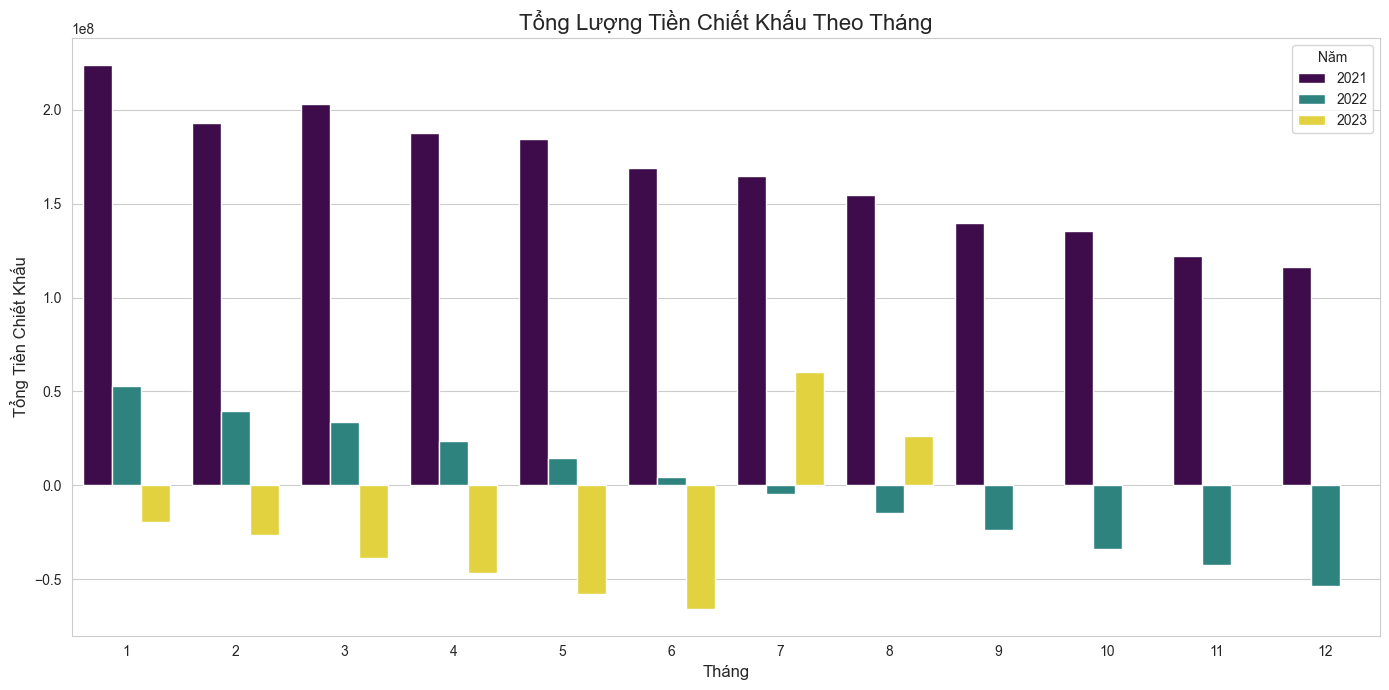

In [14]:
# trực quan hóa lượng doanh thu mà doanh nghiệp đã chi trả hàng tháng cho chiết khấu
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

ax = sns.barplot(
    data=monthly_analysis,
    x="order_month",
    y="total_discount",
    hue="order_year",
    palette="viridis"
)

plt.title("Tổng Lượng Tiền Chiết Khấu Theo Tháng", fontsize=16)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Tổng Tiền Chiết Khấu", fontsize=12)
plt.xticks(range(0, 12), labels=range(1, 13))
plt.legend(title="Năm")
plt.tight_layout()
plt.show()

## **1.3. Ngành hàng đang dùng nhiều chiết khấu nhất**

In [15]:
# doanh thu và chiết khấu theo ngành hàng (Category1)
category_analysis = (
    df.group_by("category1")
    .agg([
        pl.sum("gross_revenue").alias("total_gross_revenue"),
        pl.sum("net_revenue").alias("total_net_revenue"),
        pl.sum("discount_amount").alias("total_discount")
    ])
    .with_columns(
        # tính tỷ lệ chiết khấu tổng thể của mỗi ngành hàng
        pl.when(pl.col("total_gross_revenue") > 0)
          .then(((pl.col("total_discount") / pl.col("total_gross_revenue")) * 100))
          .otherwise(0)
          .alias("overall_discount_rate")
    )
    .sort("total_discount", descending=True)
    .to_pandas()
)

print("Top 10 ngành hàng 'đốt' nhiều tiền chiết khấu nhất:")
print(category_analysis.head(10))

Top 10 ngành hàng 'đốt' nhiều tiền chiết khấu nhất:
     category1  total_gross_revenue  total_net_revenue  total_discount  \
0      OYUNCAK         3.370647e+09       2.916367e+09    4.542800e+08   
1           EV         3.831525e+09       3.390863e+09    4.406621e+08   
2     KOZMETIK         2.221470e+09       1.954393e+09    2.670770e+08   
3         GIDA         1.015754e+09       8.980706e+08    1.176831e+08   
4        BEBEK         7.615051e+08       6.640686e+08    9.743656e+07   
5     DETERJAN         7.447389e+08       6.524714e+08    9.226747e+07   
6  KAHVALTILIK         7.220882e+08       6.332542e+08    8.883395e+07   
7    SEKERLEME         5.523067e+08       4.855988e+08    6.670792e+07   
8     TEMIZLIK         5.202909e+08       4.591633e+08    6.112759e+07   
9     ET-TAVUK         2.858773e+08       2.508350e+08    3.504225e+07   

   overall_discount_rate  
0              13.477532  
1              11.500959  
2              12.022539  
3              11.585795 

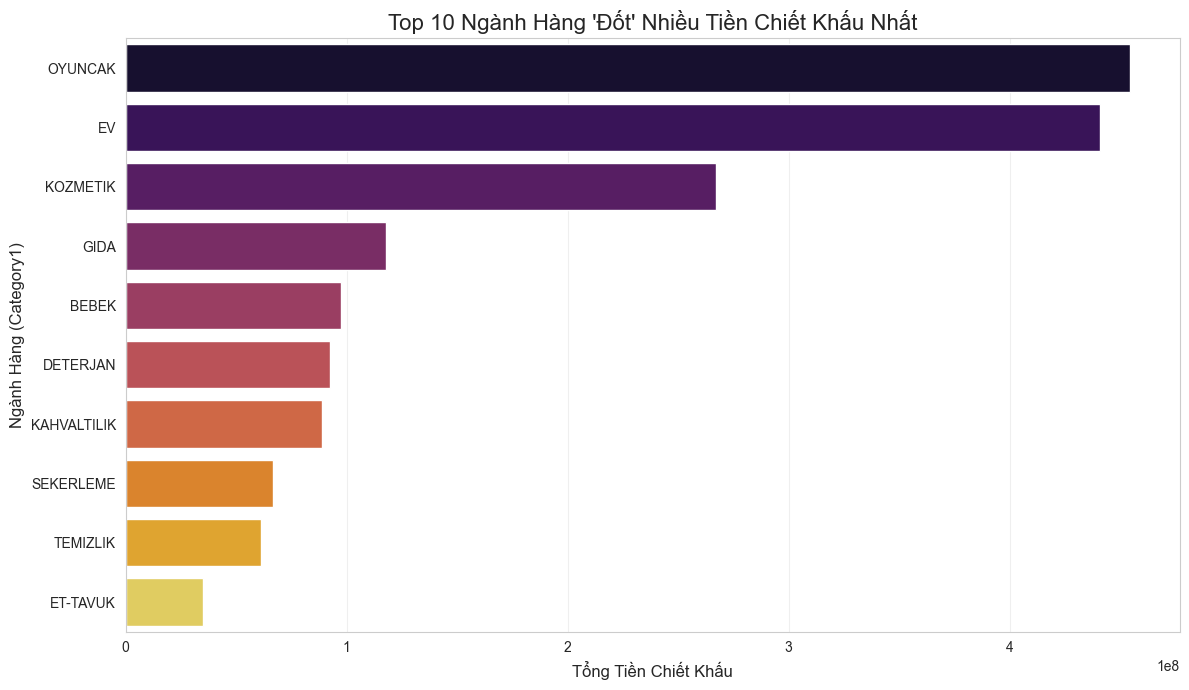

In [16]:
top_10_discount_categories = category_analysis.head(10)

plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_10_discount_categories,
    x="total_discount",
    y="category1",
    palette="inferno"
)

plt.title("Top 10 Ngành Hàng 'Đốt' Nhiều Tiền Chiết Khấu Nhất", fontsize=16)
plt.xlabel("Tổng Tiền Chiết Khấu", fontsize=12)
plt.ylabel("Ngành Hàng (Category1)", fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## **1.4. Doanh thu theo thời gian**

In [36]:
# doanh thu theo ngày 
daily_revenue = (
    df.group_by(pl.col("order_date").dt.date().alias("order_day"))
      .agg(pl.col("net_revenue").sum().alias("daily_revenue"))
      .sort("order_day")
      .to_pandas()
)

# doanh thu theo tháng
monthly_revenue = (
    df.group_by(["order_year", "order_month"])
      .agg(pl.col("net_revenue").sum().alias("monthly_revenue"))
      .sort(["order_year", "order_month"])
      .to_pandas()
)

# doanh thu theo năm
yearly_revenue = (
    df.group_by("order_year")
      .agg(pl.col("net_revenue").sum().alias("yearly_revenue"))
      .sort("order_year")
      .to_pandas()
)

print("Doanh thu hàng năm")
print(yearly_revenue)
print("\nDoanh thu thuần hàng tháng")
print(monthly_revenue.head())

Doanh thu hàng năm
   order_year  yearly_revenue
0        2021    3.708810e+09
1        2022    5.701508e+09
2        2023    3.695319e+09

Doanh thu thuần hàng tháng
   order_year  order_month  monthly_revenue
0        2021            1     2.623948e+08
1        2021            2     2.453722e+08
2        2021            3     2.805780e+08
3        2021            4     2.812204e+08
4        2021            5     3.007239e+08


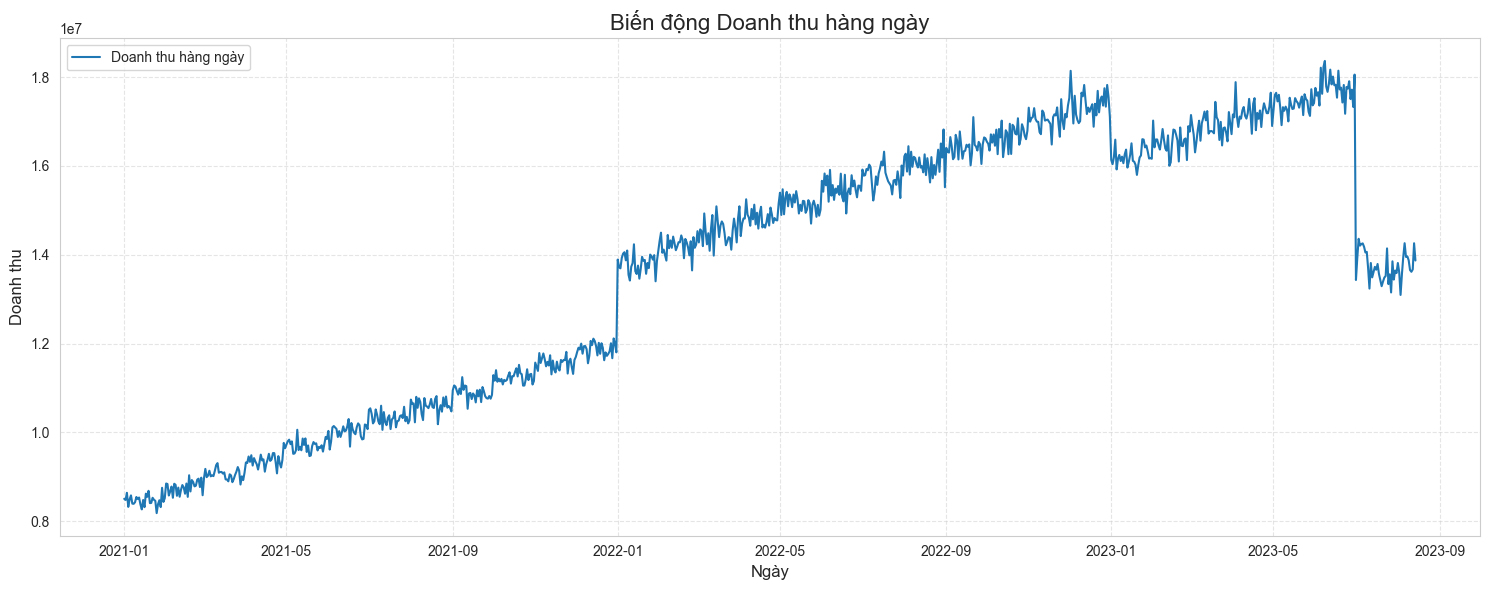

In [37]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))
plt.plot(daily_revenue["order_day"], daily_revenue["daily_revenue"], label="Doanh thu hàng ngày")
plt.title("Biến động Doanh thu hàng ngày", fontsize=16)
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Doanh thu", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

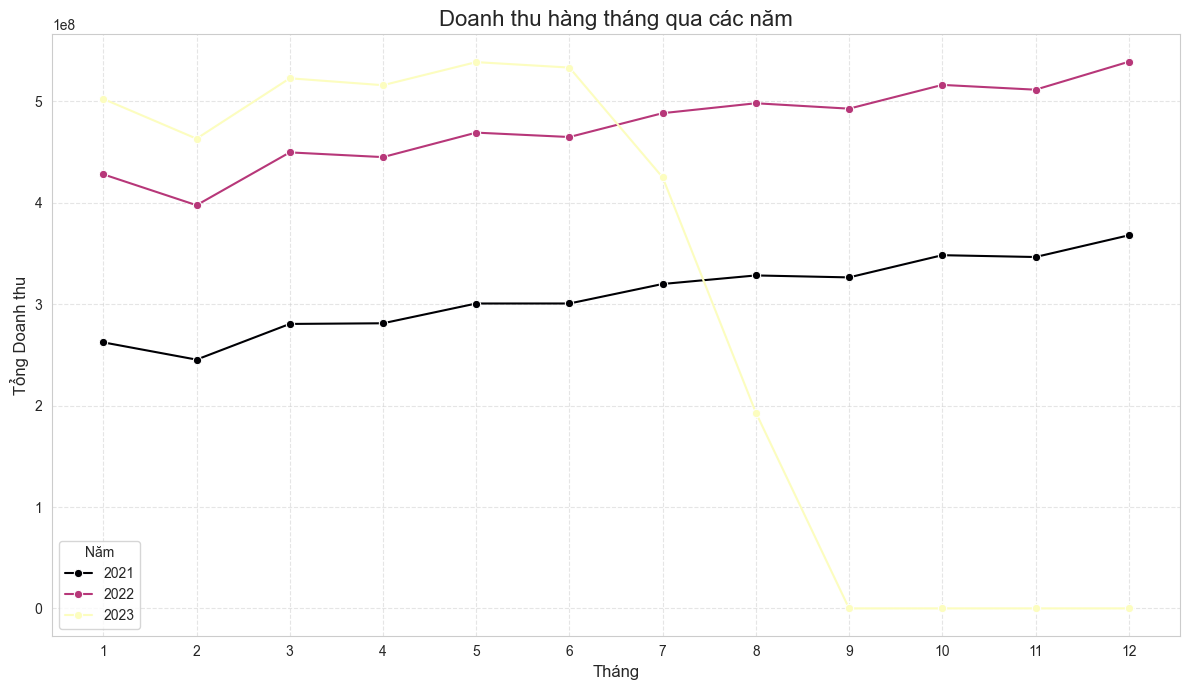

In [38]:
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=monthly_revenue,
    x="order_month",
    y="monthly_revenue",
    hue="order_year",
    marker="o",
    palette="magma"
)
plt.title("Doanh thu hàng tháng qua các năm", fontsize=16)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Tổng Doanh thu", fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title="Năm")
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

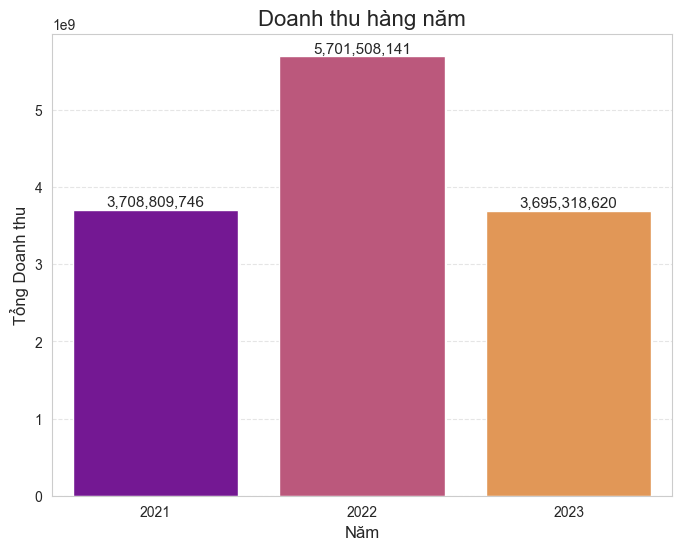

In [39]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=yearly_revenue,
    x="order_year",
    y="yearly_revenue",
    palette="plasma"
)
plt.title("Doanh thu hàng năm", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Tổng Doanh thu", fontsize=12)
plt.grid(axis='y', alpha=0.5, linestyle='--')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height(), 
            f'{bar.get_height():,.0f}', 
            ha='center', va='bottom', fontsize=11)

plt.show()

## **1.5. Doanh thu theo khu vực**

In [21]:
# doanh thu theo vùng
region_revenue = (
    df.group_by("branch_region")
      .agg(pl.col("net_revenue").sum().alias("region_revenue"))
      .sort("region_revenue", descending=True)
      .to_pandas()
)

print("Doanh thu theo Vùng")
print(region_revenue)

Doanh thu theo Vùng
       branch_region  region_revenue
0            Marmara    3.815074e+09
1         İç Anadolu    2.091936e+09
2                Ege    1.893638e+09
3            Akdeniz    1.670290e+09
4  Güneydoğu Anadolu    1.424158e+09
5          Karadeniz    1.244741e+09
6       Doğu Anadolu    9.658008e+08


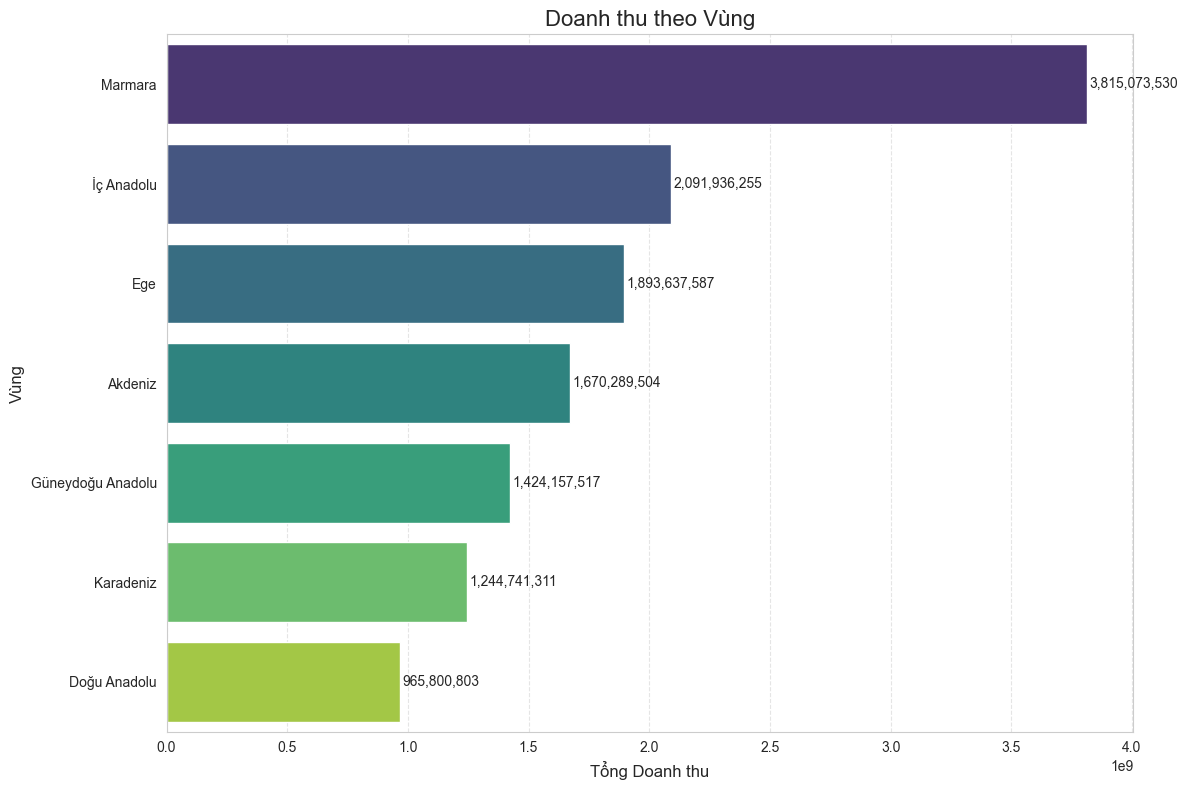

In [22]:
# trực quan thống kê doanh thu
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=region_revenue,
    x="region_revenue",
    y="branch_region",
    palette="viridis"
)

plt.title("Doanh thu theo Vùng", fontsize=16)
plt.xlabel("Tổng Doanh thu", fontsize=12)
plt.ylabel("Vùng", fontsize=12)
plt.grid(axis='x', alpha=0.5, linestyle='--')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1e7,  
             p.get_y() + p.get_height() / 2,
             f'{width:,.0f}',
             va='center')

plt.tight_layout()
plt.show()

## **1.6. Ngành hàng mang lại doanh thu cao nhất**

In [23]:
category_revenue = (
    df.group_by("category1")
      .agg(pl.col("net_revenue").sum().alias("category_revenue"))
      .sort("category_revenue", descending=True)
      .to_pandas()
)

print("Top 10 Ngành hàng có Doanh thu cao nhất")
print(category_revenue.head(15))

Top 10 Ngành hàng có Doanh thu cao nhất
          category1  category_revenue
0                EV      3.390863e+09
1           OYUNCAK      2.916367e+09
2          KOZMETIK      1.954393e+09
3              GIDA      8.980706e+08
4             BEBEK      6.640686e+08
5          DETERJAN      6.524714e+08
6       KAHVALTILIK      6.332542e+08
7         SEKERLEME      4.855988e+08
8          TEMIZLIK      4.591633e+08
9          ET-TAVUK      2.508350e+08
10              SUT      2.249195e+08
11            KAGIT      1.442534e+08
12  CAY-KAHVE-SEKER      1.404504e+08
13  SOGUK ICECEKLER      7.796601e+07
14        SIGARALAR      4.923853e+07


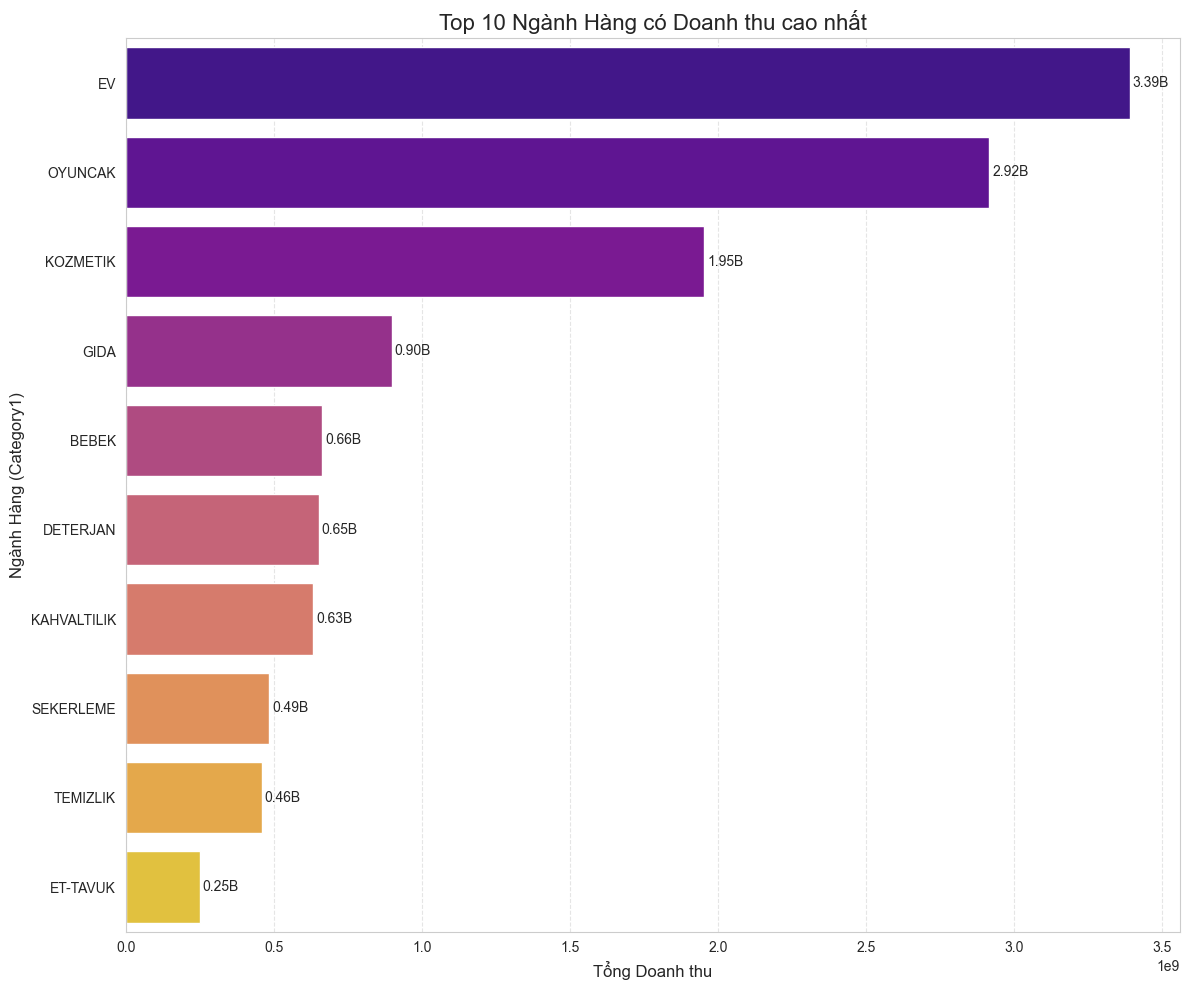

In [24]:
top_10_categories = category_revenue.head(10)

plt.figure(figsize=(12, 10))
ax = sns.barplot(
    data=top_10_categories,
    x="category_revenue",
    y="category1",
    palette="plasma"
)

plt.title("Top 10 Ngành Hàng có Doanh thu cao nhất", fontsize=16)
plt.xlabel("Tổng Doanh thu", fontsize=12)
plt.ylabel("Ngành Hàng (Category1)", fontsize=12)
plt.grid(axis='x', alpha=0.5, linestyle='--')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1e7, 
             p.get_y() + p.get_height() / 2,
             f'{(width / 1e9):.2f}B',
             va='center')

plt.tight_layout()
plt.show()

## **1.7. Dự đoán doanh thu sử dụng mô hình Linear Regression**

In [14]:
# =========================================================
# 1.7.1 LẤY MẪU PHÂN TẦNG (STRATIFIED SAMPLING) THEO NĂM (Memory-Efficient Version)
# =========================================================
import polars as pl
import numpy as np

SAMPLE_N = 5_000_000 # Số lượng mẫu mong muốn
STRATIFY_COL = "order_year" # Cột dùng để phân tầng
SEED = 42 # Để đảm bảo kết quả lấy mẫu giống nhau mỗi lần chạy

# Dòng này sẽ in ra "51185032"
print(f"Kích thước gốc (df): {df.height} dòng") 

actual_sample_n_total = min(SAMPLE_N, df.height)
if actual_sample_n_total < SAMPLE_N:
    print(f"Cảnh báo: Dữ liệu chỉ có {df.height} dòng. Lấy mẫu tối đa {actual_sample_n_total} dòng.")

# 1. Tính toán số lượng mẫu cần lấy cho mỗi tầng (năm)
print("Đang tính toán tỷ lệ phân tầng...")
total_rows = df.height
strata_counts = df.group_by(STRATIFY_COL).count().sort(STRATIFY_COL) 

strata_counts = strata_counts.with_columns(
    (pl.col("count") / total_rows * actual_sample_n_total).round(0).cast(pl.Int64).alias("n_samples_per_stratum")
)

# Điều chỉnh làm tròn
current_total_samples = strata_counts["n_samples_per_stratum"].sum()
diff = actual_sample_n_total - current_total_samples
if diff != 0:
    max_count_stratum = strata_counts.sort("count", descending=True)[STRATIFY_COL][0]
    strata_counts = strata_counts.with_columns(
        pl.when(pl.col(STRATIFY_COL) == max_count_stratum)
        .then(pl.col("n_samples_per_stratum") + diff)
        .otherwise(pl.col("n_samples_per_stratum"))
        .alias("n_samples_per_stratum")
    )

print("\nSố lượng mẫu dự kiến lấy cho mỗi tầng (năm):")
print(strata_counts)

# 2. Thực hiện lấy mẫu (Cách hiệu quả hơn để tránh MemoryError)
print("\nĐang thực hiện lấy mẫu (có thể mất vài phút)...")
samples_list = []
# Lặp qua từng tầng (từng năm) để lấy mẫu riêng
for row in strata_counts.iter_rows(named=True):
    stratum_value = row[STRATIFY_COL]
    n_to_sample = row["n_samples_per_stratum"]
    
    if n_to_sample > 0:
        print(f"  - Đang lấy {n_to_sample:,} mẫu từ năm {stratum_value}...")
        stratum_sample = (
            df.filter(pl.col(STRATIFY_COL) == stratum_value)
              .sample(n=n_to_sample, with_replacement=False, shuffle=True, seed=SEED)
        )
        samples_list.append(stratum_sample)

# 3. Kết hợp các mẫu
print("Đang kết hợp các mẫu...")
df_sampled = pl.concat(samples_list)

# =========================================================
# TẠO BIẾN df_lr MỚI (KHÔNG GHI ĐÈ df GỐC)
# =========================================================
df_lr = df_sampled.sample(fraction=1, shuffle=True, seed=SEED) # Xáo trộn lại lần nữa
print(f"\nKích thước sau khi lấy mẫu phân tầng (df_lr): {df_lr.height} dòng") # <-- Sẽ in ra 5000000

# In ra 5 dòng đầu của dữ liệu ĐÃ LẤY MẪU (df_lr)
print("\n5 dòng đầu của dữ liệu sau khi lấy mẫu (df_lr):")
print(df_lr.head()) 

# Kiểm tra phân phối số lượng theo năm trong MẪU (df_lr)
print("\nPhân phối số lượng theo năm trong MẪU (df_lr):")
print(df_lr.group_by(STRATIFY_COL).count().sort(STRATIFY_COL))

Kích thước gốc (df): 51185032 dòng
Đang tính toán tỷ lệ phân tầng...

Số lượng mẫu dự kiến lấy cho mỗi tầng (năm):
shape: (3, 3)
┌────────────┬──────────┬───────────────────────┐
│ order_year ┆ count    ┆ n_samples_per_stratum │
│ ---        ┆ ---      ┆ ---                   │
│ i32        ┆ u32      ┆ i64                   │
╞════════════╪══════════╪═══════════════════════╡
│ 2021       ┆ 19557518 ┆ 1910472               │
│ 2022       ┆ 19532102 ┆ 1907990               │
│ 2023       ┆ 12095412 ┆ 1181538               │
└────────────┴──────────┴───────────────────────┘

Đang thực hiện lấy mẫu (có thể mất vài phút)...
  - Đang lấy 1,910,472 mẫu từ năm 2021...
  - Đang lấy 1,907,990 mẫu từ năm 2022...
  - Đang lấy 1,181,538 mẫu từ năm 2023...
Đang kết hợp các mẫu...

Kích thước sau khi lấy mẫu phân tầng (df_lr): 5000000 dòng

5 dòng đầu của dữ liệu sau khi lấy mẫu (df_lr):
shape: (5, 24)
┌──────────┬──────────────┬────────────┬─────────────┬───┬─────────────────┬─────────┬────────────

In [15]:
# 1.7.2 XỬ LÝ CỘT NGÀY
# =========================================================
date_col = None
# Dùng df_lr thay vì df
for c in df_lr.columns:
    if "date" in c.lower():
        date_col = c
        break
if date_col is None:
    raise RuntimeError(" Không tìm thấy cột ngày (chứa 'date').")

print(f" Dùng cột ngày: {date_col}")

# Nếu kiểu dữ liệu là chuỗi thì chuyển sang datetime
if df_lr[date_col].dtype == pl.Utf8:
    # Dùng df_lr (đây là dòng bạn phát hiện bị sai)
    df_lr = df_lr.with_columns(  # <--- ĐÃ SỬA (df_lr)
        pl.col(date_col).str.to_datetime(strict=False).alias(date_col)
    )

# Lọc bỏ null, sắp xếp
# Dùng df_lr
df_lr = df_lr.filter(pl.col(date_col).is_not_null()).sort(date_col)

print(" 5 dòng đầu sau khi xử lý cột ngày (trên df_lr):")
# Dùng df_lr
print(df_lr.select(date_col).head())

 Dùng cột ngày: order_date
 5 dòng đầu sau khi xử lý cột ngày (trên df_lr):
shape: (5, 1)
┌─────────────────────┐
│ order_date          │
│ ---                 │
│ datetime[μs]        │
╞═════════════════════╡
│ 2021-01-01 00:00:00 │
│ 2021-01-01 00:00:00 │
│ 2021-01-01 00:00:00 │
│ 2021-01-01 00:00:00 │
│ 2021-01-01 00:00:00 │
└─────────────────────┘


In [16]:
# 1.7.3 TỔNG HỢP THEO THÁNG
# =========================================================
# Dùng df_lr
df_lr = df_lr.with_columns(pl.col(date_col).dt.truncate("1mo").alias("month"))

monthly = (
    # Dùng df_lr
    df_lr.group_by("month")
      .agg(pl.col("net_revenue").sum().alias("net_revenue"))
      .sort("month")
)

print(" Số tháng thu thập được:", monthly.height)
print(monthly.head())

 Số tháng thu thập được: 32
shape: (5, 2)
┌─────────────────────┬─────────────┐
│ month               ┆ net_revenue │
│ ---                 ┆ ---         │
│ datetime[μs]        ┆ f64         │
╞═════════════════════╪═════════════╡
│ 2021-01-01 00:00:00 ┆ 2.5445e7    │
│ 2021-02-01 00:00:00 ┆ 2.4163e7    │
│ 2021-03-01 00:00:00 ┆ 2.7271e7    │
│ 2021-04-01 00:00:00 ┆ 2.7394e7    │
│ 2021-05-01 00:00:00 ┆ 2.9528e7    │
└─────────────────────┴─────────────┘


In [17]:
# =========================================================
# 1.7.4 CHIA TRAIN / TEST 
# =========================================================
import polars as pl

# Thêm cột chỉ số thời gian t (0, 1, 2, ...)
monthly = monthly.with_columns(
    t = pl.int_range(0, pl.count())  
)

# Xác định kích thước tập test
test_size = 6 if monthly.height > 12 else max(1, monthly.height // 5)

# Chia train/test
train = monthly.slice(0, monthly.height - test_size)
test = monthly.slice(monthly.height - test_size)

# Tách biến đầu vào và đầu ra
X_train = train.select("t")
y_train = train.select("net_revenue")
X_test = test.select("t")
y_test = test.select("net_revenue")

print(f" Tổng tháng: {monthly.height}, Train: {train.height}, Test: {test.height}")


 Tổng tháng: 32, Train: 26, Test: 6


In [18]:
from sklearn.linear_model import LinearRegression

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train.to_numpy(), y_train.to_numpy())
print(" Mô hình LinearRegression huấn luyện xong.")

# In phương trình hồi quy
intercept = float(model.intercept_)
coef = float(model.coef_.ravel()[0])  # ép về số thực
print(f" Phương trình: net_revenue = {intercept:.2f} + {coef:.2f} * t")


 Mô hình LinearRegression huấn luyện xong.
 Phương trình: net_revenue = 24824298.49 + 1131704.48 * t


In [19]:
# =========================================================
# 1.7.4 HUẤN LUYỆN MÔ HÌNH TUYẾN TÍNH
# =========================================================
from sklearn.linear_model import LinearRegression

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Ép hệ số về float để tránh lỗi định dạng
intercept = float(model.intercept_.ravel()[0] if hasattr(model.intercept_, "ravel") else model.intercept_)
coef = float(model.coef_.ravel()[0] if hasattr(model.coef_, "ravel") else model.coef_)

print(" Mô hình đã huấn luyện xong.")
print(f" Phương trình: net_revenue = {intercept:.2f} + {coef:.2f} * t")


 Mô hình đã huấn luyện xong.
 Phương trình: net_revenue = 24824298.49 + 1131704.48 * t


In [20]:
# =========================================================
# 1.7.7 ĐÁNH GIÁ MÔ HÌNH 
# =========================================================
import polars as pl
import numpy as np

# 🔹 Dự đoán (ép về 1D list)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Nếu đầu ra là mảng 2D, ta flatten về 1D
if y_pred_train.ndim > 1:
    y_pred_train = y_pred_train.flatten()
if y_pred_test.ndim > 1:
    y_pred_test = y_pred_test.flatten()

# 🔹 Gộp kết quả vào DataFrame Polars
df_train_eval = pl.DataFrame({
    "actual": y_train.to_series().to_numpy().flatten().tolist(),
    "pred": y_pred_train.tolist()
})

df_test_eval = pl.DataFrame({
    "actual": y_test.to_series().to_numpy().flatten().tolist(),
    "pred": y_pred_test.tolist()
})

# 🔹 Tính bình phương sai số
df_train_eval = df_train_eval.with_columns(
    ((pl.col("actual") - pl.col("pred")) ** 2).alias("sq_error")
)
df_test_eval = df_test_eval.with_columns(
    ((pl.col("actual") - pl.col("pred")) ** 2).alias("sq_error")
)

# 🔹 RMSE (Root Mean Square Error)
rmse_train = df_train_eval["sq_error"].mean() ** 0.5
rmse_test = df_test_eval["sq_error"].mean() ** 0.5

# 🔹 R² thủ công
ss_res = ((df_test_eval["actual"] - df_test_eval["pred"]) ** 2).sum()
ss_tot = ((df_test_eval["actual"] - df_test_eval["actual"].mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)

print("=== KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ===")
print(f" RMSE (Train): {rmse_train:,.2f}")
print(f" RMSE (Test):  {rmse_test:,.2f}")
print(f" R² (Test):    {r2:.4f}")


=== KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ===
 RMSE (Train): 2,361,865.62
 RMSE (Test):  18,670,931.65
 R² (Test):    -1.3711


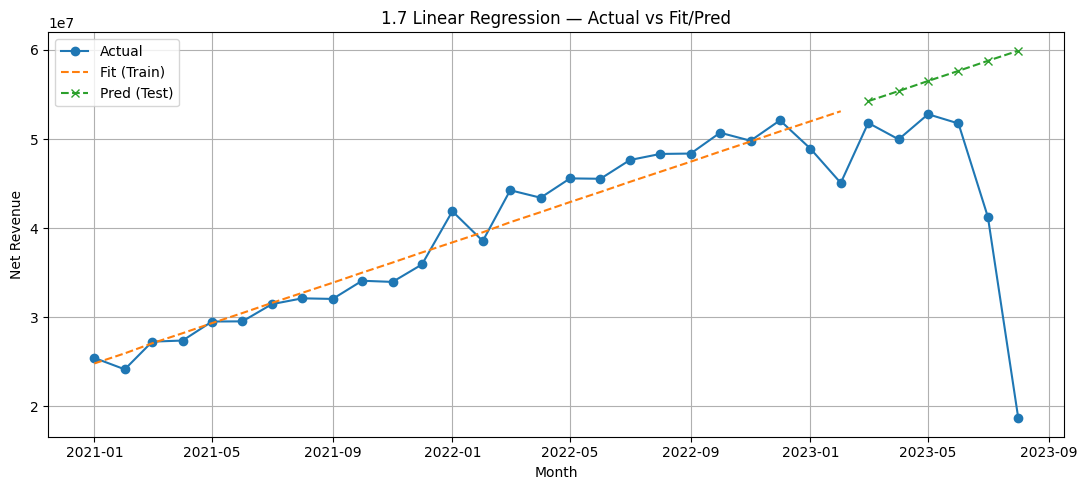

In [21]:
# 1.7.8 VẼ BIỂU ĐỒ
# =========================================================
plt.figure(figsize=(11,5))
plt.plot(monthly["month"], monthly["net_revenue"], marker="o", label="Actual")
plt.plot(train["month"], y_pred_train, linestyle="--", label="Fit (Train)")
plt.plot(test["month"], y_pred_test, marker="x", linestyle="--", label="Pred (Test)")
plt.title("1.7 Linear Regression — Actual vs Fit/Pred")
plt.xlabel("Month")
plt.ylabel("Net Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Kết quả đánh giá mô hình:

Đề cập đến chỉ số R² âm (-1.3741) trên tập test. Giải thích rằng R² âm nghĩa là mô hình dự đoán tệ hơn cả việc chỉ dùng giá trị trung bình của dữ liệu test để dự đoán.

So sánh RMSE giữa tập train (khoảng 2.36M) và tập test (khoảng 18.66M). Việc RMSE trên tập test cao hơn rất nhiều cho thấy mô hình không khái quát hóa tốt cho dữ liệu mới (overfitting hoặc đơn giản là mô hình quá yếu).

Trực quan hóa:

Tham chiếu đến các biểu đồ ở cell 38 và cell 42. Chỉ ra rằng đường dự đoán tuyến tính (đường thẳng) không thể bám sát được sự biến động thực tế của doanh thu, đặc biệt là ở giai đoạn test và dự đoán tương lai. Doanh thu thực tế có vẻ biến động mạnh hơn và có thể theo chu kỳ hoặc mùa vụ.

Bản chất của Linear Regression:

Mô hình hồi quy tuyến tính chỉ có thể mô hình hóa được xu hướng tuyến tính (đường thẳng tăng hoặc giảm đều). Nó không thể tự động nhận biết và mô hình hóa các yếu tố phức tạp khác thường có trong dữ liệu doanh thu như:

Tính mùa vụ (Seasonality): Doanh thu thường cao hơn vào các tháng/quý nhất định trong năm (ví dụ: cuối năm, lễ tết).

Tính chu kỳ (Cyclicality): Các biến động dài hạn hơn liên quan đến chu kỳ kinh tế.

Xu hướng phi tuyến tính: Doanh thu có thể tăng trưởng nhanh rồi chậm lại, hoặc ngược lại.

Các yếu tố nhiễu ngẫu nhiên: Các sự kiện bất thường ảnh hưởng đến doanh thu.

## **1.8. Dự đoán doanh thu trong 6 tháng tới**

In [22]:
# =========================================================
# 1.8.1 TẠO DỮ LIỆU CHO 6 THÁNG TIẾP THEO 
# =========================================================

from datetime import date
from dateutil.relativedelta import relativedelta  

# 🔹 Số tháng muốn dự đoán
num_future_months = 6

# 🔹 Lấy giá trị 't' cuối cùng từ dữ liệu monthly
last_t = monthly["t"][-1]  # vì monthly đã có cột t (0, 1, 2, ...)

# 🔹 Tạo các giá trị 't' cho 6 tháng tới
future_t = np.arange(last_t + 1, last_t + 1 + num_future_months).reshape(-1, 1)

# 🔹 Lấy ngày tháng cuối cùng từ dữ liệu 'monthly'
last_month_date = monthly["month"].to_list()[-1]

# 🔹 Tạo danh sách các tháng tương lai
future_months_dates = [
    last_month_date + relativedelta(months=i) for i in range(1, num_future_months + 1)
]

print(f"Giá trị 't' cuối cùng trong dữ liệu: {last_t}")
print(f"Các giá trị 't' dự đoán: {future_t.ravel().tolist()}")
print(f"Tháng cuối cùng trong dữ liệu: {last_month_date.strftime('%Y-%m')}")
print(f"Các tháng dự đoán: {[d.strftime('%Y-%m') for d in future_months_dates]}")


Giá trị 't' cuối cùng trong dữ liệu: 31
Các giá trị 't' dự đoán: [32, 33, 34, 35, 36, 37]
Tháng cuối cùng trong dữ liệu: 2023-08
Các tháng dự đoán: ['2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02']


In [23]:

# =========================================================
# 1.8.2 DỰ ĐOÁN DOANH THU
# =========================================================

# Sử dụng mô hình đã huấn luyện (model từ cell 1.7.5) để dự đoán
future_revenue_pred = model.predict(future_t)

# Tạo DataFrame Polars cho kết quả dự đoán
future_predictions_df = pl.DataFrame({
    "month_future": future_months_dates,
    "t_future": future_t.ravel(),
    "predicted_revenue": future_revenue_pred
})

print("=== DỰ ĐOÁN DOANH THU 6 THÁNG TỚI ===")
print(future_predictions_df)

=== DỰ ĐOÁN DOANH THU 6 THÁNG TỚI ===
shape: (6, 3)
┌─────────────────────┬──────────┬───────────────────┐
│ month_future        ┆ t_future ┆ predicted_revenue │
│ ---                 ┆ ---      ┆ ---               │
│ datetime[μs]        ┆ i32      ┆ array[f64, 1]     │
╞═════════════════════╪══════════╪═══════════════════╡
│ 2023-09-01 00:00:00 ┆ 32       ┆ [6.1039e7]        │
│ 2023-10-01 00:00:00 ┆ 33       ┆ [6.2171e7]        │
│ 2023-11-01 00:00:00 ┆ 34       ┆ [6.3302e7]        │
│ 2023-12-01 00:00:00 ┆ 35       ┆ [6.4434e7]        │
│ 2024-01-01 00:00:00 ┆ 36       ┆ [6.5566e7]        │
│ 2024-02-01 00:00:00 ┆ 37       ┆ [6.6697e7]        │
└─────────────────────┴──────────┴───────────────────┘


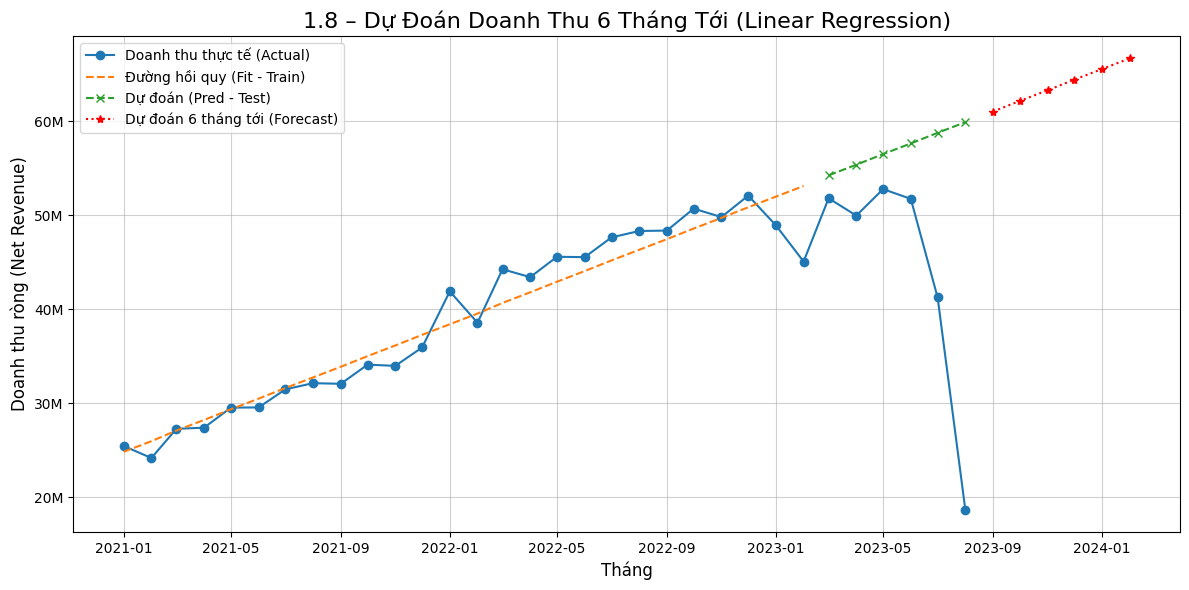

In [24]:

# =========================================================
# 1.8.3 VẼ BIỂU ĐỒ DỰ ĐOÁN
# =========================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Chuyển DataFrame Polars 'monthly' sang Pandas để vẽ dễ hơn
monthly_pd = monthly.to_pandas()
future_predictions_pd = future_predictions_df.to_pandas()


plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.plot(monthly_pd["month"], monthly_pd["net_revenue"], marker="o", linestyle="-", label="Doanh thu thực tế (Actual)")

# Vẽ đường fit trên tập train (từ cell 1.7.7)
plt.plot(monthly_pd["month"][:-test_size], y_pred_train, linestyle="--", label="Đường hồi quy (Fit - Train)")

# Vẽ dự đoán trên tập test (từ cell 1.7.7)
plt.plot(monthly_pd["month"][-test_size:], y_pred_test, linestyle="--", marker="x", label="Dự đoán (Pred - Test)")

# Vẽ dự đoán cho 6 tháng tới
plt.plot(future_predictions_pd["month_future"], future_predictions_pd["predicted_revenue"], linestyle=":", marker="*", color="red", label="Dự đoán 6 tháng tới (Forecast)")

# Định dạng trục Y cho dễ đọc (ví dụ: triệu, tỷ)
formatter = mticker.FuncFormatter(lambda x, p: f'{x/1e6:,.0f}M') # Hiển thị theo triệu (M)
plt.gca().yaxis.set_major_formatter(formatter)


plt.title("1.8 – Dự Đoán Doanh Thu 6 Tháng Tới (Linear Regression)", fontsize=16)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Doanh thu ròng (Net Revenue)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

# **2. Phân tích giỏ hàng**

## **2.2. Combo sản phẩm**

In [51]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from collections import Counter

In [78]:
# gom nhóm theo order_id và list sản phẩm 
transaction_data = (
    df
    .select(["order_id", "category4"])  
    .group_by("order_id")
    .agg(pl.col("category4").alias("items"))
)

In [79]:
transactions = transaction_data["items"].to_list()

# chỉ giữ lại những đơn hàng có trên 1 sản phẩm (đơn có 1 sản phẩm - không tạo được luật)
# vd: chỉ giữ những đơn trên 1 sản phẩm: {bánh mì, sữa, bơ} | loại bỏ các đơn 1 sản phẩm {bánh mì} hoặc {sữa}
transactions = [t for t in transactions if len(t) > 1]

print(f"Số giao dịch sau khi lọc: {len(transactions)}")

Số giao dịch sau khi lọc: 9098651


In [80]:
np.random.seed(42)
SAMPLE_SIZE = 500_000 # 500k mẫu giao dịch
TOP_N_ITEMS = 500

actual_sample_size = min(SAMPLE_SIZE, len(transactions))
if actual_sample_size < SAMPLE_SIZE:
    print(f"Số lượng giao dịch không đủ dữ liệu. Lấy mẫu tối đa: {actual_sample_size:,}")

sample_idx = np.random.choice(len(transactions), size=actual_sample_size, replace=False)
transactions_sample_raw = [transactions[i] for i in sample_idx]

print(f"Số giao dịch mẫu đã lấy: {len(transactions_sample_raw):,}")

Số giao dịch mẫu đã lấy: 500,000


In [81]:
# lọc top 500 sản phẩm phổ biến nhất từ tập 500k mẫu
all_items = [item for t in transactions_sample_raw for item in t]
item_counts = Counter(all_items)
top_items = set([item for item, count in item_counts.most_common(TOP_N_ITEMS)])

In [82]:
# lọc lại các sản phẩm chỉ chứa các item phổ biến
filtered_transactions = [
    [item for item in t if item in top_items]
    for t in transactions_sample_raw
]

filtered_transactions = [t for t in filtered_transactions if len(t) > 1] # loại bỏ những giao dịch chỉ còn 0 hoặc 1 item sau khi lọc

print(f"Số giao dịch cuối cùng: {len(filtered_transactions):,}")
print(f"Số lượng item duy nhất tham gia phân tích: {len(top_items)}")

Số giao dịch cuối cùng: 498,447
Số lượng item duy nhất tham gia phân tích: 500


In [83]:
# mã hóa dữ liệu 
te = TransactionEncoder()
te_ary = te.fit(filtered_transactions).transform(filtered_transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

In [89]:
# dùng thuật toán FP-Growth sinh luật kết hợp
MIN_SUPPORT = 0.002
frequent_itemsets = fpgrowth(df_trans, min_support=MIN_SUPPORT, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values("support", ascending=False)
print(f"Có {len(frequent_itemsets)} tập phổ biến")

MemoryError: Unable to allocate 1.86 GiB for an array with shape (498447, 500) and data type float64

In [ ]:
MIN_THRESHOLD = 1.0
rules_1m = association_rules(frequent_itemsets, metric="lift", min_threshold=MIN_THRESHOLD)
rules_1m = rules_1m.sort_values(["confidence", "lift"], ascending=[False, False])
print(f"Tìm thấy {len(rules_1m)} luật kết hợp")

print("\nTop 10 luật kết hợp mạnh nhất:")
display(rules_1m.head(10))

Tìm thấy 302 luật kết hợp

Top 10 luật kết hợp mạnh nhất:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
132,(GOFRET),(KIRTASIYE),0.040722,0.461576,0.019106,0.469181,1.016477,1.0,0.000310,1.014327,0.016898,0.039541,0.014125,0.255287
297,(KREMLER),(KIRTASIYE),0.021774,0.461576,0.010176,0.467346,1.012501,1.0,0.000126,1.010833,0.012622,0.021506,0.010717,0.244696
122,(SIVI-JEL SABUNLAR),(KIRTASIYE),0.041470,0.461576,0.019342,0.466409,1.010472,1.0,0.000200,1.009058,0.010811,0.039987,0.008977,0.254157
298,(VUCUT SAMPUANLARI),(KIRTASIYE),0.021804,0.461576,0.010162,0.466061,1.009717,1.0,0.000098,1.008400,0.009838,0.021474,0.008330,0.244039
193,"(OYUNCAKLAR, CORAPLAR)",(KIRTASIYE),0.029740,0.461576,0.013852,0.465770,1.009086,1.0,0.000125,1.007851,0.009280,0.029012,0.007789,0.247890
182,"(BISKUVI, MUTFAK ESYA-GERECLERI)",(KIRTASIYE),0.030402,0.461576,0.014152,0.465496,1.008492,1.0,0.000119,1.007333,0.008684,0.029617,0.007280,0.248078
165,(BULASIK MAKINASI URUNLERI),(KIRTASIYE),0.034640,0.461576,0.016124,0.465473,1.008444,1.0,0.000135,1.007291,0.008674,0.033585,0.007239,0.250203
290,"(OYUNCAKLAR, PEYNIRLER)",(KIRTASIYE),0.022370,0.461576,0.010412,0.465445,1.008382,1.0,0.000087,1.007237,0.008502,0.021988,0.007185,0.244001
99,"(KITAP, SAMPUANLAR)",(KIRTASIYE),0.045650,0.461576,0.021236,0.465192,1.007833,1.0,0.000165,1.006761,0.008144,0.043696,0.006715,0.255600
44,"(OYUNCAKLAR, MUTFAK ESYA-GERECLERI)",(KIRTASIYE),0.086138,0.461576,0.040034,0.464766,1.006911,1.0,0.000275,1.005960,0.007510,0.078857,0.005924,0.275750


In [ ]:
top10_itemsets = frequent_itemsets.sort_values("support", ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(
    [' + '.join(list(i)) for i in top10_itemsets['itemsets']],
    top10_itemsets['support'] * 100
)
plt.gca().invert_yaxis()
plt.title("Top 10 tập phổ biến (mẫu 1 triệu đơn, top 500 items)", fontsize=14)
plt.xlabel("Support (%)")
plt.ylabel("Itemsets")

for bar in bars:
    plt.text(
        bar.get_width() + 0.3,
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.2f}%",
        va='center'
    )

plt.tight_layout()
plt.show()

# **5 Hệ thống gợi ý**

In [7]:
# hệ thống gợi ý
# rule-based - dựa trên tần suất xuất hiện != item-based - dựa trên mức độ tương đồng sản phẩm
# quy tắc nếu A => thì B
# chi cần dữ liệu bán hàng, không cần ma trận user-item
# nhanh nhưng chưa cá nhân hóa
def recommend_for_cart(cart_items, rules, pop_ctx, k=8):
    candidates = {}
    for a in cart_items:
        for _, row in rules[rules['antecedents'].apply(lambda s: a in s)].iterrows():
            for b in row['consequents']:
                if b in cart_items: 
                    continue
                score = 0.5*row['lift'] + 0.4*row['confidence'] + 0.1*row['support']
                candidates[b] = max(candidates.get(b, 0), score)
    for b, p in pop_ctx.items():
        candidates.setdefault(b, 0.05*p)
    return sorted(candidates.items(), key=lambda x: x[1], reverse=True)[:k]

In [8]:
# danh sách sản phẩm khách đang mua
cart_items = ["KITAPLAR", "KIRTASIYE GERECLERI"]

# pop_ctx: độ phổ biến sản phẩm
pop_ctx = dict(zip(itemsets["itemsets"].astype(str), itemsets["support"]))

# gợi ý 3 sản phẩm
RECOMMEND_ITEMS = 3
recommendations = recommend_for_cart(cart_items, rules, pop_ctx, k=RECOMMEND_ITEMS)

for product, score in recommendations:
    match = rules[rules["consequents"].apply(lambda s: product in s)]
    if not match.empty:
        lift = match["lift"].iloc[0]
        conf = match["confidence"].iloc[0]
        supp = match["support"].iloc[0]
        print(f"{product:30s} | Lift: {lift:.3f} | Conf: {conf:.3f} | Supp: {supp:.3f} | Score: {score:.3f}")
    else:
        print(f"{product:30s} | (Không có luật trực tiếp, score = {score:.3f})")

NameError: name 'itemsets' is not defined

In [ ]:
# **6 Phân cụm**

In [27]:
print("--- Bắt đầu Phân tích RFM (3.1) ---")
# Dòng này sẽ in ra 51185032
print(f"Sử dụng df (gốc {df.height} dòng) để tính toán. Bước này có thể mất vài phút...")

try:
    # 1. Tính toán ngày snapshot (ngày cuối cùng + 1)
    snapshot_date = df.select(pl.max("order_date")).item() + timedelta(days=1)
    print(f"Snapshot date (Last order date + 1): {snapshot_date}")

    # 2. Tính toán R, F, M cho mỗi user_id
    print("Đang tính toán R, F, M...")
    rfm_df = df.group_by("user_id").agg([
        (snapshot_date - pl.max("order_date")).dt.total_days().alias("Recency"),
        pl.col("order_id").n_unique().alias("Frequency"),
        pl.col("net_revenue").sum().alias("Monetary")
    ])

    print(f"Tính xong RFM cho {rfm_df.height} khách hàng.")
    print("5 dòng đầu của dữ liệu RFM (rfm_df):")
    print(rfm_df.head())

except Exception as e:
    print(f"Lỗi ngay bước tính toán RFM ban đầu: {e}")

--- Bắt đầu Phân tích RFM (3.1) ---
Sử dụng df (gốc 51185032 dòng) để tính toán. Bước này có thể mất vài phút...
Snapshot date (Last order date + 1): 2023-08-15 00:00:00
Đang tính toán R, F, M...
Tính xong RFM cho 99996 khách hàng.
5 dòng đầu của dữ liệu RFM (rfm_df):
shape: (5, 4)
┌─────────┬─────────┬───────────┬───────────┐
│ user_id ┆ Recency ┆ Frequency ┆ Monetary  │
│ ---     ┆ ---     ┆ ---       ┆ ---       │
│ str     ┆ i64     ┆ u32       ┆ f64       │
╞═════════╪═════════╪═══════════╪═══════════╡
│ 44307   ┆ 1       ┆ 111       ┆ 144458.87 │
│ 4857    ┆ 4       ┆ 90        ┆ 120661.19 │
│ 57454   ┆ 11      ┆ 108       ┆ 137721.25 │
│ 76921   ┆ 1       ┆ 113       ┆ 141317.47 │
│ 5485    ┆ 5       ┆ 109       ┆ 146196.2  │
└─────────┴─────────┴───────────┴───────────┘


In [28]:
try:
    # In ra số dòng của rfm_df (theo yêu cầu của bạn)
    print(f"Tổng số khách hàng (dòng) trong rfm_df: {rfm_df.height}") 
    
    # 3. Tính điểm R, F, M (sử dụng pandas qcut cho tiện lợi, 5 bins)
    print("Đang tính điểm RFM (1-5)...")
    # Chuyển sang Pandas để dùng qcut, vì nó xử lý duplicate tốt hơn
    rfm_pd = rfm_df.to_pandas()
    
    # Xử lý trường hợp F hoặc M có quá nhiều giá trị giống nhau (vd: freq=1) bằng rank(method='first')
    
    # Recency: Càng nhỏ càng tốt (điểm cao)
    rfm_pd['R_score'] = pd.qcut(rfm_pd['Recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop').astype(int)
    
    # Frequency: Càng lớn càng tốt (điểm cao)
    # Dùng rank(method='first') để đảm bảo các giá trị F=1 được phân bổ đều qua các bins
    rfm_pd['F_score'] = pd.qcut(rfm_pd['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
    
    # Monetary: Càng lớn càng tốt (điểm cao)
    rfm_pd['M_score'] = pd.qcut(rfm_pd['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)

    # 4. Tạo điểm tổng hợp và phân khúc
    rfm_df = pl.from_pandas(rfm_pd) # Chuyển về lại Polars
    rfm_df = rfm_df.with_columns(
        RFM_Score = pl.col("R_score").cast(str) + pl.col("F_score").cast(str) + pl.col("M_score").cast(str),
        RFM_Sum = pl.col("R_score") + pl.col("F_score") + pl.col("M_score")
    )
    print("Đã tính xong điểm RFM.")
    print("5 dòng đầu của rfm_df sau khi tính điểm:")
    print(rfm_df.head())

except Exception as e:
    print(f"Lỗi khi tính điểm RFM (qcut): {e}")
    print("Có thể do một số cột (vd: Recency) có quá ít giá trị duy nhất.")
    print("Kiểm tra rfm_df.describe() nếu cần.")

Tổng số khách hàng (dòng) trong rfm_df: 99996
Đang tính điểm RFM (1-5)...
Đã tính xong điểm RFM.
5 dòng đầu của rfm_df sau khi tính điểm:
shape: (5, 9)
┌─────────┬─────────┬───────────┬───────────┬───┬─────────┬─────────┬───────────┬─────────┐
│ user_id ┆ Recency ┆ Frequency ┆ Monetary  ┆ … ┆ F_score ┆ M_score ┆ RFM_Score ┆ RFM_Sum │
│ ---     ┆ ---     ┆ ---       ┆ ---       ┆   ┆ ---     ┆ ---     ┆ ---       ┆ ---     │
│ str     ┆ i64     ┆ u32       ┆ f64       ┆   ┆ i32     ┆ i32     ┆ str       ┆ i32     │
╞═════════╪═════════╪═══════════╪═══════════╪═══╪═════════╪═════════╪═══════════╪═════════╡
│ 44307   ┆ 1       ┆ 111       ┆ 144458.87 ┆ … ┆ 4       ┆ 4       ┆ 544       ┆ 13      │
│ 4857    ┆ 4       ┆ 90        ┆ 120661.19 ┆ … ┆ 1       ┆ 2       ┆ 412       ┆ 7       │
│ 57454   ┆ 11      ┆ 108       ┆ 137721.25 ┆ … ┆ 4       ┆ 4       ┆ 244       ┆ 10      │
│ 76921   ┆ 1       ┆ 113       ┆ 141317.47 ┆ … ┆ 5       ┆ 4       ┆ 554       ┆ 14      │
│ 5485    ┆ 5       

Đang gán nhãn phân khúc khách hàng...

Phân tích đặc điểm các phân cụm RFM:
shape: (8, 5)
┌─────────────────────────────────┬─────────────┬───────────────┬───────────────┬────────────────┐
│ Segment                         ┆ Avg_Recency ┆ Avg_Frequency ┆ Avg_Monetary  ┆ Customer_Count │
│ ---                             ┆ ---         ┆ ---           ┆ ---           ┆ ---            │
│ str                             ┆ f64         ┆ f64           ┆ f64           ┆ u32            │
╞═════════════════════════════════╪═════════════╪═══════════════╪═══════════════╪════════════════╡
│ Khách hàng Sắp rời bỏ (At Risk… ┆ 18.271328   ┆ 108.400814    ┆ 138726.087955 ┆ 21122          │
│ Khách VIP (Champions)           ┆ 2.770188    ┆ 112.332185    ┆ 143751.934141 ┆ 17993          │
│ Khách hàng Đã rời bỏ (Hibernat… ┆ 19.639086   ┆ 92.415037     ┆ 118465.353118 ┆ 16666          │
│ Khách hàng tiềm năng (Potentia… ┆ 2.797964    ┆ 99.632706     ┆ 127670.111552 ┆ 16205          │
│ Khách hàng cần ch

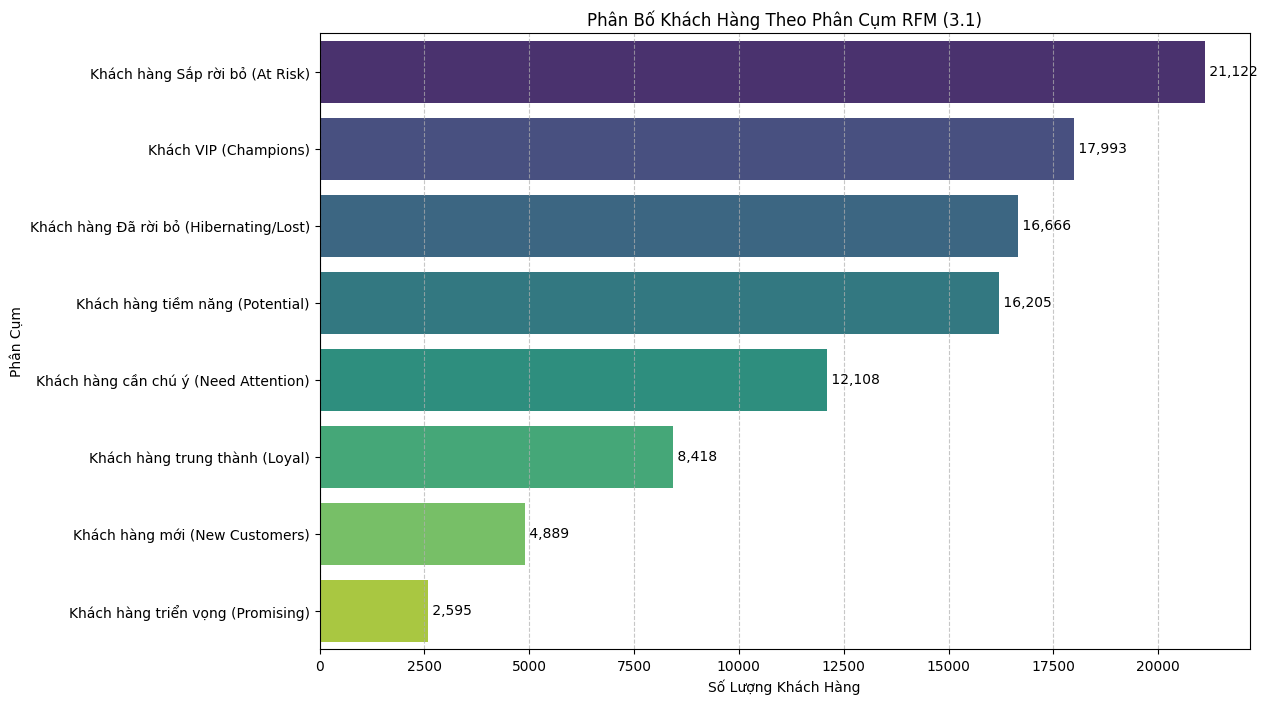

In [29]:
try:
    # 5. Định nghĩa các phân khúc
    print("Đang gán nhãn phân khúc khách hàng...")
    # Chuyển sang Pandas để dùng replace (regex) cho tiện
    rfm_pd = rfm_df.to_pandas()
    
    # Định nghĩa các phân khúc dựa trên điểm R và F (M thường tương quan với F)
    # Đây là một cách phân khúc phổ biến, bạn có thể tùy chỉnh nếu muốn
    seg_map = {
        r'[45][45]': 'Khách VIP (Champions)',          # R=4-5, F=4-5
        r'[34][45]': 'Khách hàng trung thành (Loyal)', # R=3-4, F=4-5
        r'[45][23]': 'Khách hàng tiềm năng (Potential)', # R=4-5, F=2-3
        r'51': 'Khách hàng mới (New Customers)',      # R=5, F=1
        r'41': 'Khách hàng triển vọng (Promising)',   # R=4, F=1
        r'3[1-3]': 'Khách hàng cần chú ý (Need Attention)', # R=3, F=1-3
        r'[12][345]': 'Khách hàng Sắp rời bỏ (At Risk)', # R=1-2, F=3-5
        r'[12][12]': 'Khách hàng Đã rời bỏ (Hibernating/Lost)' # R=1-2, F=1-2
    }
    
    # Chúng ta chỉ dùng R và F score để gán nhãn cho đơn giản
    rfm_pd['Segment'] = rfm_pd['R_score'].astype(str) + rfm_pd['F_score'].astype(str)
    rfm_pd['Segment'] = rfm_pd['Segment'].replace(seg_map, regex=True)
    
    # Gán các segment chưa khớp (nếu có) vào 'Khách hàng khác'
    rfm_pd.loc[rfm_pd['Segment'].str.match(r'^[1-5]{2}$'), 'Segment'] = 'Khách hàng khác (Others)'
    
    rfm_df = pl.from_pandas(rfm_pd)

    # 6. Phân tích các phân khúc
    print("\nPhân tích đặc điểm các phân cụm RFM:")
    segment_analysis = rfm_df.group_by("Segment").agg([
        pl.mean("Recency").alias("Avg_Recency"),
        pl.mean("Frequency").alias("Avg_Frequency"),
        pl.mean("Monetary").alias("Avg_Monetary"),
        pl.count().alias("Customer_Count")
    ]).sort("Customer_Count", descending=True)
    
    print(segment_analysis)

    # 7. Trực quan hóa phân bố phân khúc
    segment_counts_pd = segment_analysis.select(["Segment", "Customer_Count"]).to_pandas()
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=segment_counts_pd, y="Segment", x="Customer_Count", palette="viridis")
    plt.title("Phân Bố Khách Hàng Theo Phân Cụm RFM (3.1)")
    plt.xlabel("Số Lượng Khách Hàng")
    plt.ylabel("Phân Cụm")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    # Thêm text cho rõ
    for i, (count, segment) in enumerate(zip(segment_counts_pd['Customer_Count'], segment_counts_pd['Segment'])):
        plt.text(count, i, f' {count:,}', ha='left', va='center')
    plt.show()

except Exception as e:
    print(f"Lỗi trong quá trình phân khúc hoặc vẽ biểu đồ RFM: {e}")

In [31]:
print("\n--- Bắt đầu Phân cụm K-Means (3.2) ---")
from sklearn.preprocessing import StandardScaler # <--- THÊM DÒNG NÀY VÀO ĐẦU CELL

try:
    # 1. Chuẩn bị dữ liệu: Lấy R, F, M và Log transform F, M
    # Thêm +1 để tránh log(0) nếu có Frequency hoặc Monetary = 0
    rfm_for_cluster = rfm_df.select([
        pl.col("Recency"),
        (pl.col("Frequency") + 1).log().alias("Frequency_log"), 
        (pl.col("Monetary") + 1).log().alias("Monetary_log") 
    ]).to_pandas()

    # 2. Chuẩn hóa dữ liệu (Standardization)
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm_for_cluster)
    print("Dữ liệu RFM (99k khách hàng) đã được Log Transform và Chuẩn hóa (rfm_scaled).")
    print(f"Kích thước dữ liệu chuẩn hóa: {rfm_scaled.shape}")

except Exception as e:
    print(f"Lỗi khi chuẩn bị dữ liệu K-Means: {e}")


--- Bắt đầu Phân cụm K-Means (3.2) ---
Dữ liệu RFM (99k khách hàng) đã được Log Transform và Chuẩn hóa (rfm_scaled).
Kích thước dữ liệu chuẩn hóa: (99996, 3)


Đang tìm K tối ưu (Elbow Method)...


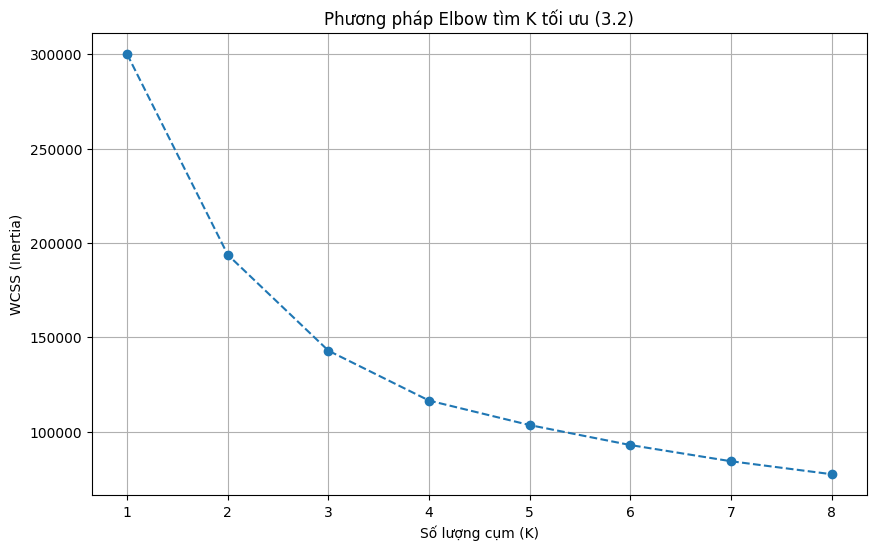

Đã vẽ biểu đồ Elbow.
Dựa vào biểu đồ Elbow, hãy chọn K tối ưu (thường là điểm 'khuỷu tay' nơi độ dốc giảm đi).


In [32]:
from sklearn.cluster import KMeans 

try:
    # 3. Tìm K tối ưu (Elbow Method)
    print("Đang tìm K tối ưu (Elbow Method)...")
    wcss = []
    # K_range = range(1, 11) # Chạy từ 1 đến 10 cụm
    K_range = range(1, 9) # Giảm xuống 8 cụm để chạy nhanh hơn một chút
    for k in K_range:
        # Giảm n_init xuống 8 để chạy nhanh hơn (mặc định là 10)
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=8) 
        kmeans.fit(rfm_scaled)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K_range, wcss, marker='o', linestyle='--')
    plt.title('Phương pháp Elbow tìm K tối ưu (3.2)')
    plt.xlabel('Số lượng cụm (K)')
    plt.ylabel('WCSS (Inertia)')
    plt.grid(True)
    plt.xticks(K_range) # Đảm bảo hiển thị tất cả các số K
    plt.show()
    print("Đã vẽ biểu đồ Elbow.")
    print("Dựa vào biểu đồ Elbow, hãy chọn K tối ưu (thường là điểm 'khuỷu tay' nơi độ dốc giảm đi).")
    
except Exception as e:
    print(f"Lỗi khi chạy Elbow method: {e}")

In [33]:
try:
    # 4. Chạy K-Means với K tối ưu 
    OPTIMAL_K = 3 
    
    print(f"Đang chạy K-Means với K={OPTIMAL_K}...")
    kmeans = KMeans(n_clusters=OPTIMAL_K, init='k-means++', random_state=42, n_init=10)
    clusters = kmeans.fit_predict(rfm_scaled)

    # Thêm cột Cluster vào rfm_df
    rfm_df = rfm_df.with_columns(pl.Series("Cluster_KMeans", clusters))

    # 5. Phân tích đặc điểm các cụm K-Means
    print("\nPhân tích đặc điểm các cụm K-Means:")
    cluster_analysis_kmeans = rfm_df.group_by("Cluster_KMeans").agg([
        pl.mean("Recency").alias("Avg_Recency"),
        pl.mean("Frequency").alias("Avg_Frequency"),
        pl.mean("Monetary").alias("Avg_Monetary"),
        pl.count().alias("Customer_Count")
    ]).sort("Cluster_KMeans")
    
    print(cluster_analysis_kmeans)

except Exception as e:
    print(f"Lỗi khi chạy K-Means hoặc phân tích cụm: {e}")

Đang chạy K-Means với K=3...

Phân tích đặc điểm các cụm K-Means:
shape: (3, 5)
┌────────────────┬─────────────┬───────────────┬───────────────┬────────────────┐
│ Cluster_KMeans ┆ Avg_Recency ┆ Avg_Frequency ┆ Avg_Monetary  ┆ Customer_Count │
│ ---            ┆ ---         ┆ ---           ┆ ---           ┆ ---            │
│ i32            ┆ f64         ┆ f64           ┆ f64           ┆ u32            │
╞════════════════╪═════════════╪═══════════════╪═══════════════╪════════════════╡
│ 0              ┆ 6.879612    ┆ 109.779092    ┆ 145074.96662  ┆ 46508          │
│ 1              ┆ 6.997481    ┆ 94.551794     ┆ 115915.470626 ┆ 39696          │
│ 2              ┆ 27.759281   ┆ 99.78676      ┆ 127400.626199 ┆ 13792          │
└────────────────┴─────────────┴───────────────┴───────────────┴────────────────┘


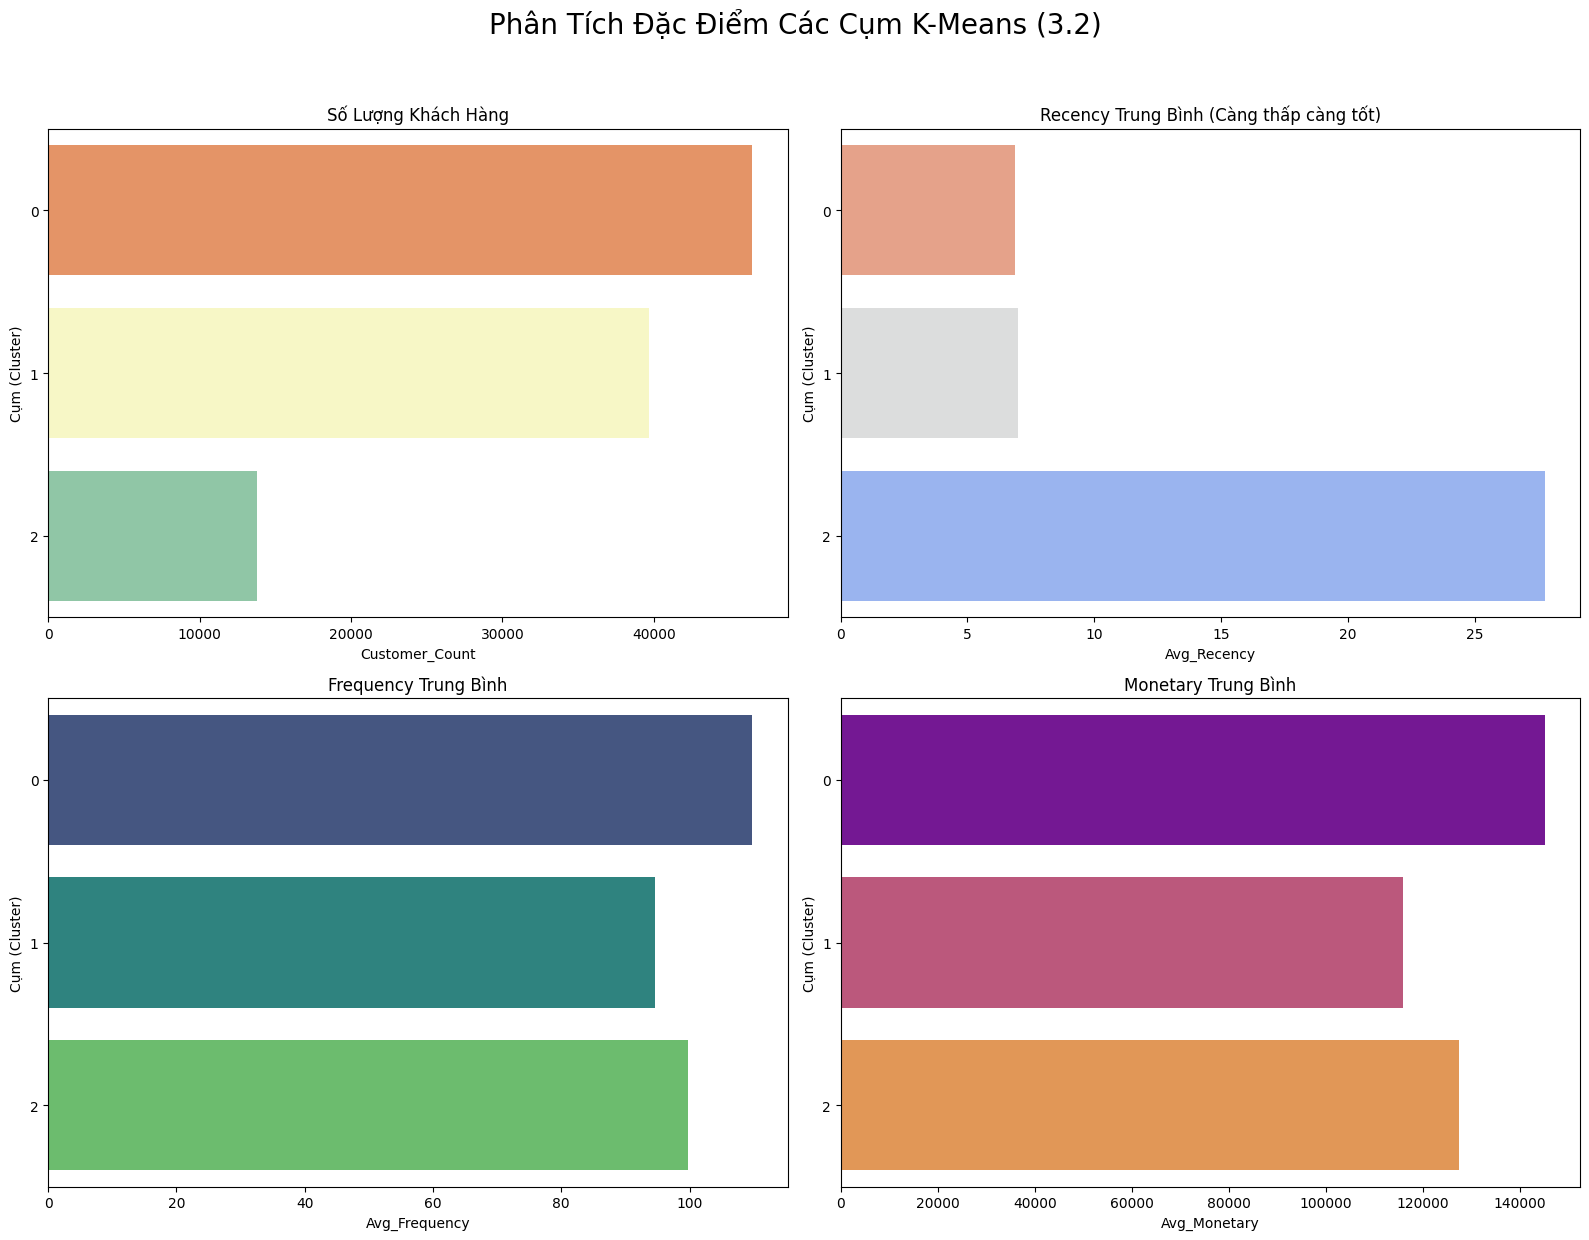

In [34]:
try:
    # 6. Trực quan hóa các cụm K-Means
    cluster_analysis_pd = cluster_analysis_kmeans.to_pandas().set_index("Cluster_KMeans")
    cluster_analysis_pd.index = cluster_analysis_pd.index.astype(str)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Phân Tích Đặc Điểm Các Cụm K-Means (3.2)', fontsize=20, y=1.03)

    sns.barplot(data=cluster_analysis_pd, y=cluster_analysis_pd.index, x="Customer_Count", orient='h', ax=axes[0, 0], palette="Spectral").set_title('Số Lượng Khách Hàng')
    sns.barplot(data=cluster_analysis_pd, y=cluster_analysis_pd.index, x="Avg_Recency", orient='h', ax=axes[0, 1], palette="coolwarm_r").set_title('Recency Trung Bình (Càng thấp càng tốt)')
    sns.barplot(data=cluster_analysis_pd, y=cluster_analysis_pd.index, x="Avg_Frequency", orient='h', ax=axes[1, 0], palette="viridis").set_title('Frequency Trung Bình')
    sns.barplot(data=cluster_analysis_pd, y=cluster_analysis_pd.index, x="Avg_Monetary", orient='h', ax=axes[1, 1], palette="plasma").set_title('Monetary Trung Bình')

    for ax in axes.flat:
        ax.set_ylabel('Cụm (Cluster)')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Lỗi khi vẽ biểu đồ K-Means: {e}")

PHẦN 4. PHÂN TÍCH SÂU VỀ KINH DOANH


--- Bắt đầu Phân tích sâu về Kinh doanh (4.0) ---
Đang phân tích tính mùa vụ (4.1)...


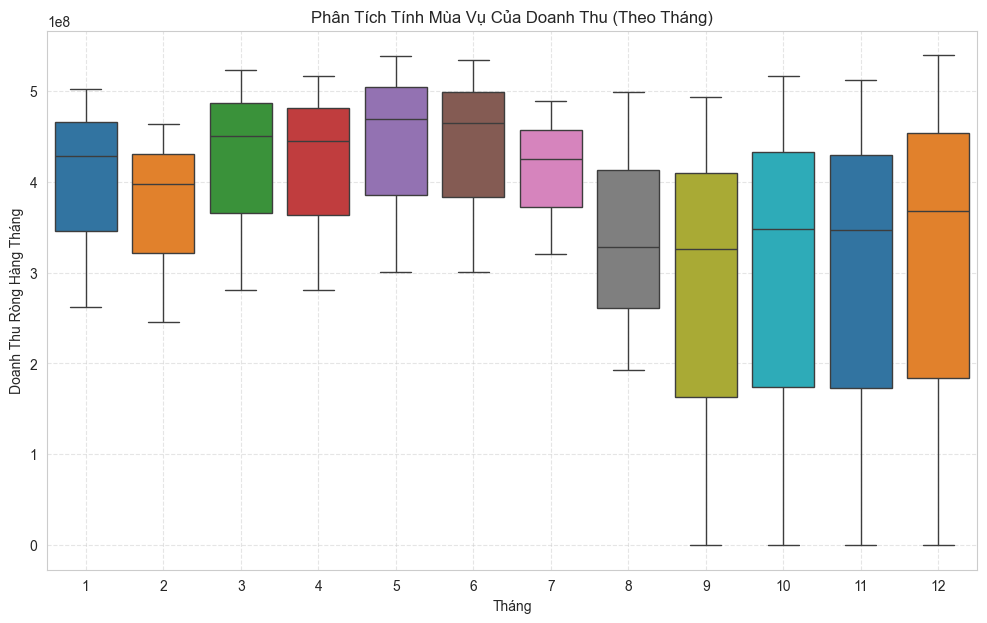

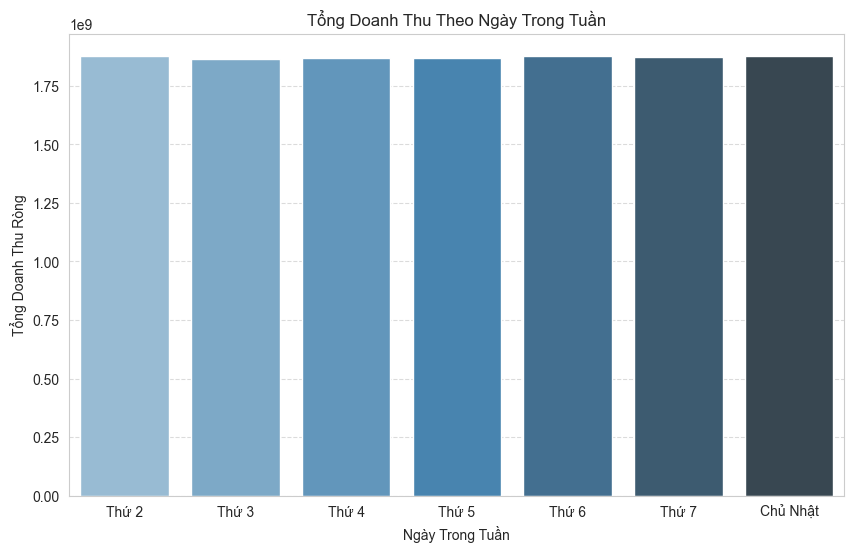

In [40]:
print("\n--- Bắt đầu Phân tích sâu về Kinh doanh (4.0) ---")
print("Đang phân tích tính mùa vụ (4.1)...")
try:
    # Sử dụng 'monthly_revenue' từ cell 17 (đã là pandas DF)
    # (Cell 17 ID: "ee448cda" trong file notebook)
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=monthly_revenue, x='order_month', y='monthly_revenue', palette='tab10')
    plt.title('Phân Tích Tính Mùa Vụ Của Doanh Thu (Theo Tháng)')
    plt.xlabel('Tháng')
    plt.ylabel('Doanh Thu Ròng Hàng Tháng')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # Phân tích theo ngày trong tuần (từ df 51M)
    daily_revenue_weekday = df.group_by("order_weekday").agg(pl.sum("net_revenue").alias("total_revenue")).sort("order_weekday").to_pandas()
    day_map = {1: 'Thứ 2', 2: 'Thứ 3', 3: 'Thứ 4', 4: 'Thứ 5', 5: 'Thứ 6', 6: 'Thứ 7', 7: 'Chủ Nhật'}
    daily_revenue_weekday['Weekday_Name'] = daily_revenue_weekday['order_weekday'].map(day_map)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=daily_revenue_weekday, x='Weekday_Name', y='total_revenue', palette='Blues_d')
    plt.title('Tổng Doanh Thu Theo Ngày Trong Tuần')
    plt.xlabel('Ngày Trong Tuần')
    plt.ylabel('Tổng Doanh Thu Ròng')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

except Exception as e:
    print(f"Lỗi khi phân tích mùa vụ: {e}. Bỏ qua 4.1")


Đang phân tích hiệu quả chi nhánh (4.2)...


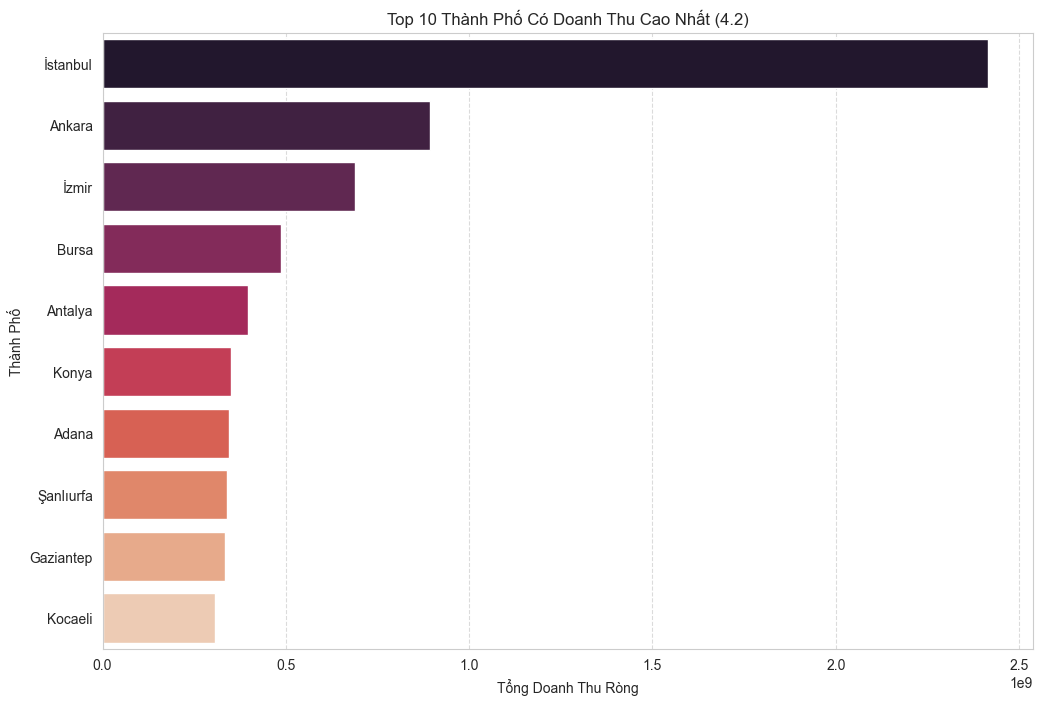

--- Hoàn thành các phân tích bổ sung ---


In [41]:
print("\nĐang phân tích hiệu quả chi nhánh (4.2)...")
try:
    # Phân tích theo Thành phố (City)
    city_revenue = (
        df.group_by("branch_city")
          .agg(pl.col("net_revenue").sum().alias("city_revenue"))
          .sort("city_revenue", descending=True)
          .to_pandas()
    )
    
    top_10_cities = city_revenue.head(10)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_10_cities, x="city_revenue", y="branch_city", palette="rocket")
    plt.title('Top 10 Thành Phố Có Doanh Thu Cao Nhất (4.2)')
    plt.xlabel('Tổng Doanh Thu Ròng')
    plt.ylabel('Thành Phố')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
    
    print("--- Hoàn thành các phân tích bổ sung ---")

except Exception as e:
    print(f"Lỗi khi phân tích chi nhánh: {e}. Bỏ qua 4.2")